In [1]:
from IPython.display import display
import matplotlib.pyplot as plt
import numpy
import pandas
import seaborn as sns
import warnings
from tools import *

%matplotlib inline

warnings.filterwarnings('ignore')

## Distribution of P(active) values for each position

In [2]:
total_compounds = pd.read_csv('../../data_preparation/output/total_compounds.csv')
display(total_compounds.head(5))

,structure,read_count,bb1,bb2,bb3,bb1_iso,bb2_iso,bb3_iso
0,CN(Cc1c(F)ccc(Cl)c1F)C(=O)CCn1ccc(C(=O)NCCC(c2...,172,NCC1=C(F)C(Cl)=CC=C1F,c1cn(nc1C(=O)O)CCC(=O)O,NCCC(C1=CC=CC=C1)C1=CC=CC=C1,c1cc(c(c(c1F)CN)F)Cl,c1cn(nc1C(=O)O)CCC(=O)O,c1ccc(cc1)C(CCN)c2ccccc2
1,CN(Cc1cc(-c2ccc(Cl)cc2)no1)C(=O)CCn1ccc(C(=O)N...,162,NCC1=CC(C2=CC=C(Cl)C=C2)=NO1,c1cn(nc1C(=O)O)CCC(=O)O,NCCC(C1=CC=CC=C1)C1=CC=CC=C1,c1cc(ccc1c2cc(on2)CN)Cl,c1cn(nc1C(=O)O)CCC(=O)O,c1ccc(cc1)C(CCN)c2ccccc2
2,CC(C)c1nc(CN(C)C(=O)CCn2ccc(C(=O)NCCC(c3ccccc3...,149,CC(C)C1=NC(CN)=NO1,c1cn(nc1C(=O)O)CCC(=O)O,NCCC(C1=CC=CC=C1)C1=CC=CC=C1,CC(C)c1nc(no1)CN,c1cn(nc1C(=O)O)CCC(=O)O,c1ccc(cc1)C(CCN)c2ccccc2
3,CN(Cc1cccc(C(F)(F)F)c1)C(=O)CCn1ccc(C(=O)NCCC(...,326,NCC1=CC(C(F)(F)F)=CC=C1,c1cn(nc1C(=O)O)CCC(=O)O,NCCC(C1=CC=CC=C1)C1=CC=CC=C1,c1cc(cc(c1)C(F)(F)F)CN,c1cn(nc1C(=O)O)CCC(=O)O,c1ccc(cc1)C(CCN)c2ccccc2
4,CC(C)Cc1cc(CN(C)C(=O)CCn2ccc(C(=O)NCCC(c3ccccc...,329,CC(C)CC1=NOC(CN)=C1,c1cn(nc1C(=O)O)CCC(=O)O,NCCC(C1=CC=CC=C1)C1=CC=CC=C1,CC(C)Cc1cc(on1)CN,c1cn(nc1C(=O)O)CCC(=O)O,c1ccc(cc1)C(CCN)c2ccccc2


In [3]:
bb1_list = pd.read_csv('../../data_preparation/output/bb1_list.csv')
bb2_list = pd.read_csv('../../data_preparation/output/bb2_list.csv')
bb3_list = pd.read_csv('../../data_preparation/output/bb3_list.csv')

In [4]:
bb1_pactive = calc_pactive(total_compounds, bb1_list, 'bb1')
bb2_pactive = calc_pactive(total_compounds, bb2_list, 'bb2')
bb3_pactive = calc_pactive(total_compounds, bb3_list, 'bb3')

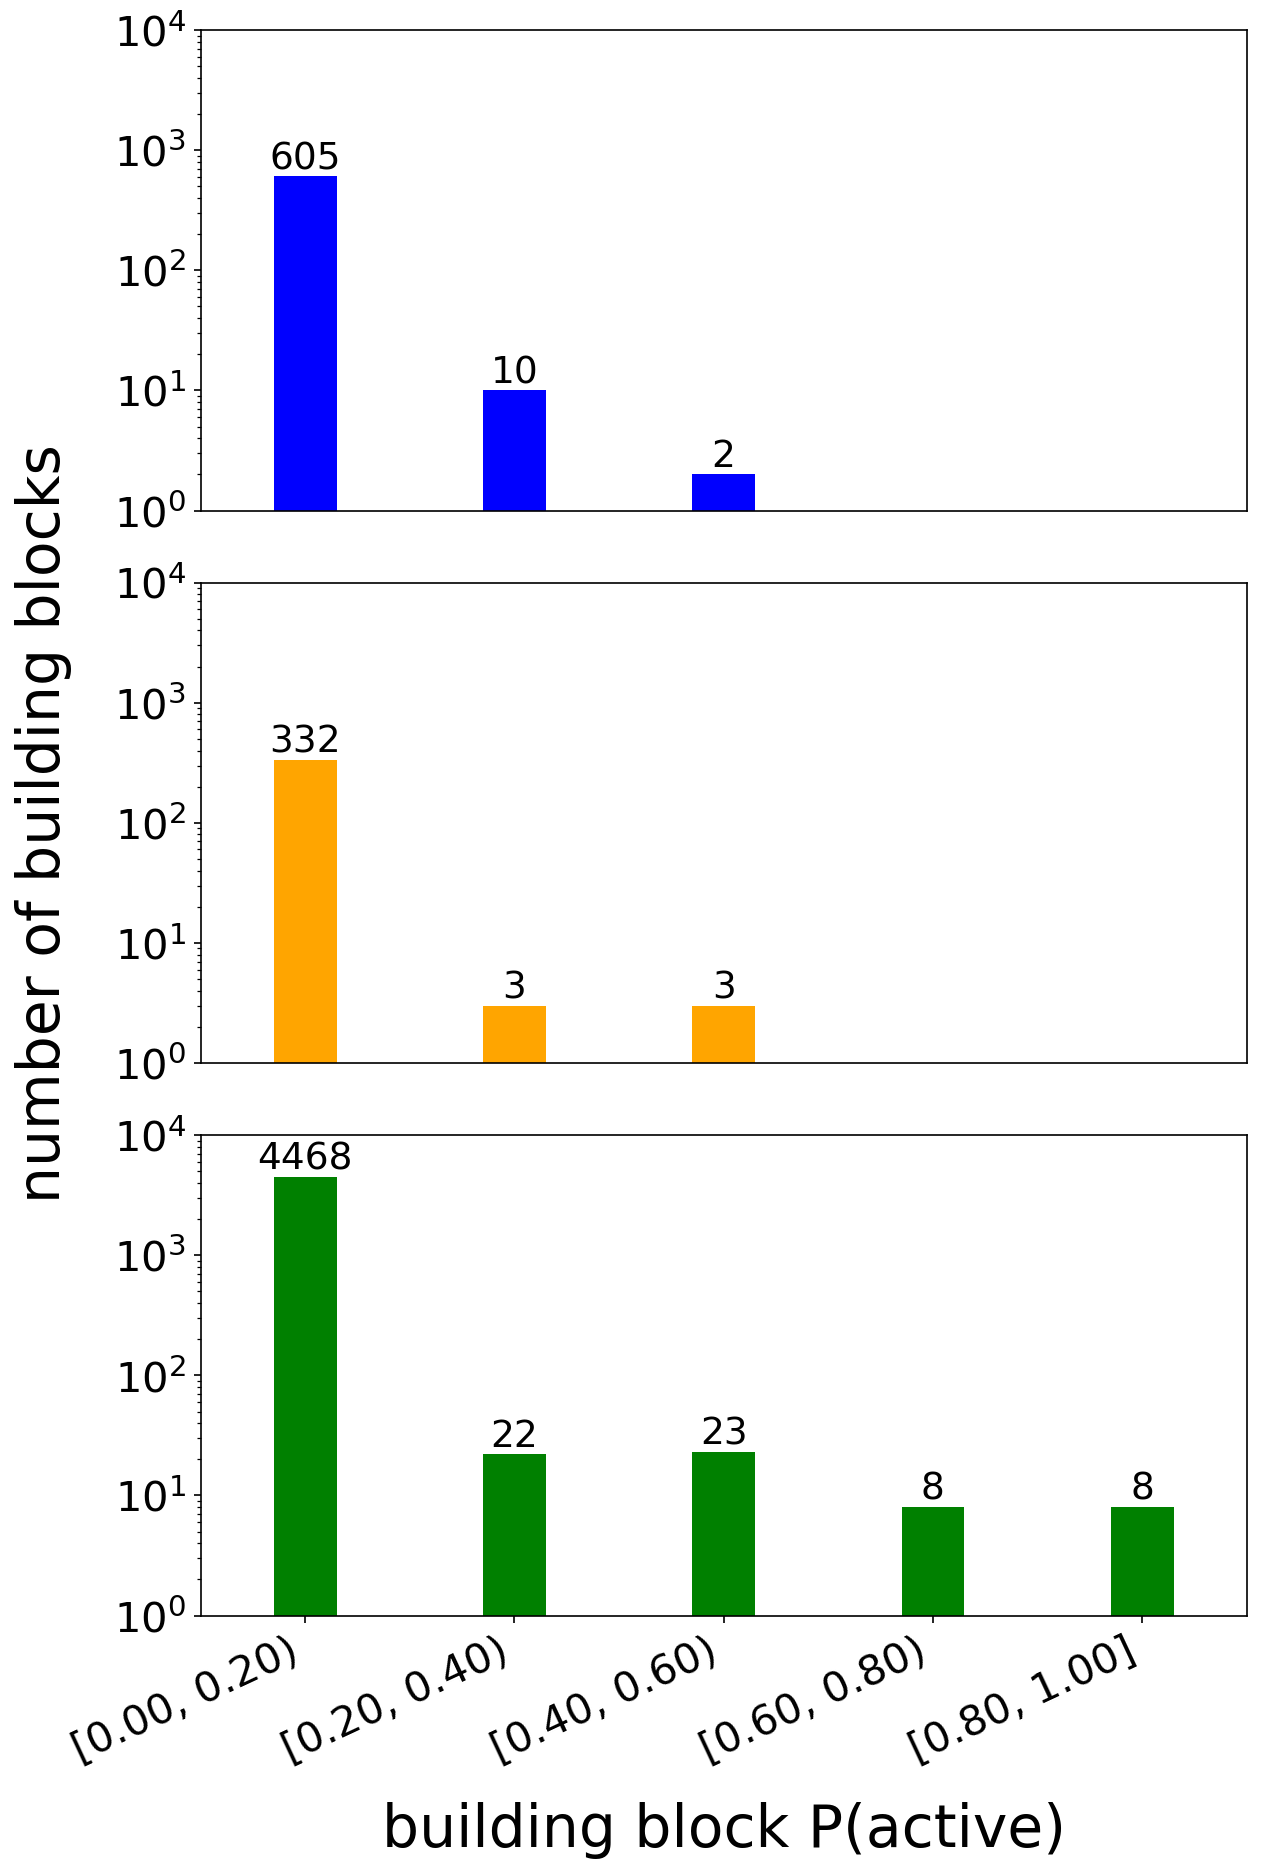

In [5]:
all_bins = np.arange(0, 1.2, 0.2)
a_bars, b_bars, c_bars = plot_pactive(bb1_pactive, bb2_pactive, bb3_pactive, all_bins)

### Visualize top P(active) building blocks at each position

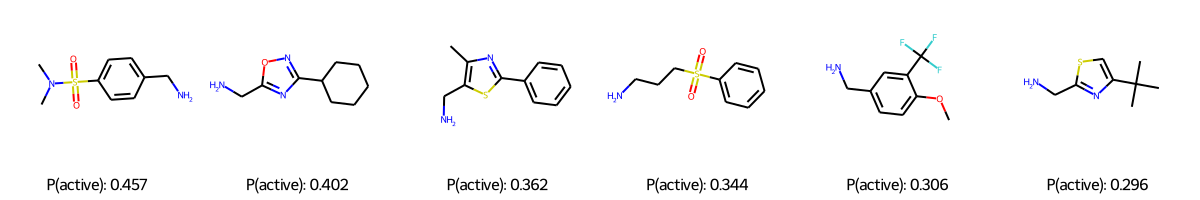

In [6]:
view_top_bbs(bb1_pactive, bb_pos="bb1", N=6)

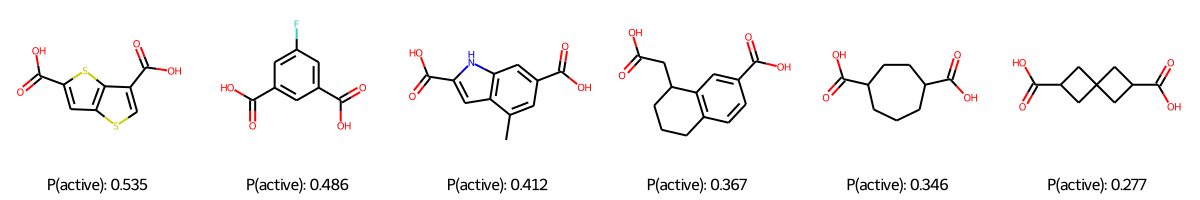

In [7]:
view_top_bbs(bb2_pactive, bb_pos="bb2", N=6)

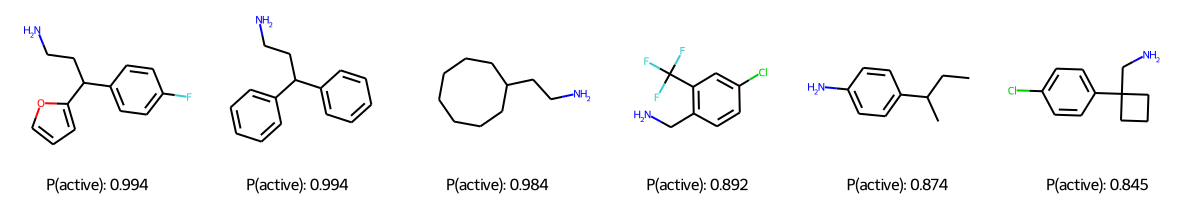

In [8]:
view_top_bbs(bb3_pactive, bb_pos="bb3", N=6)

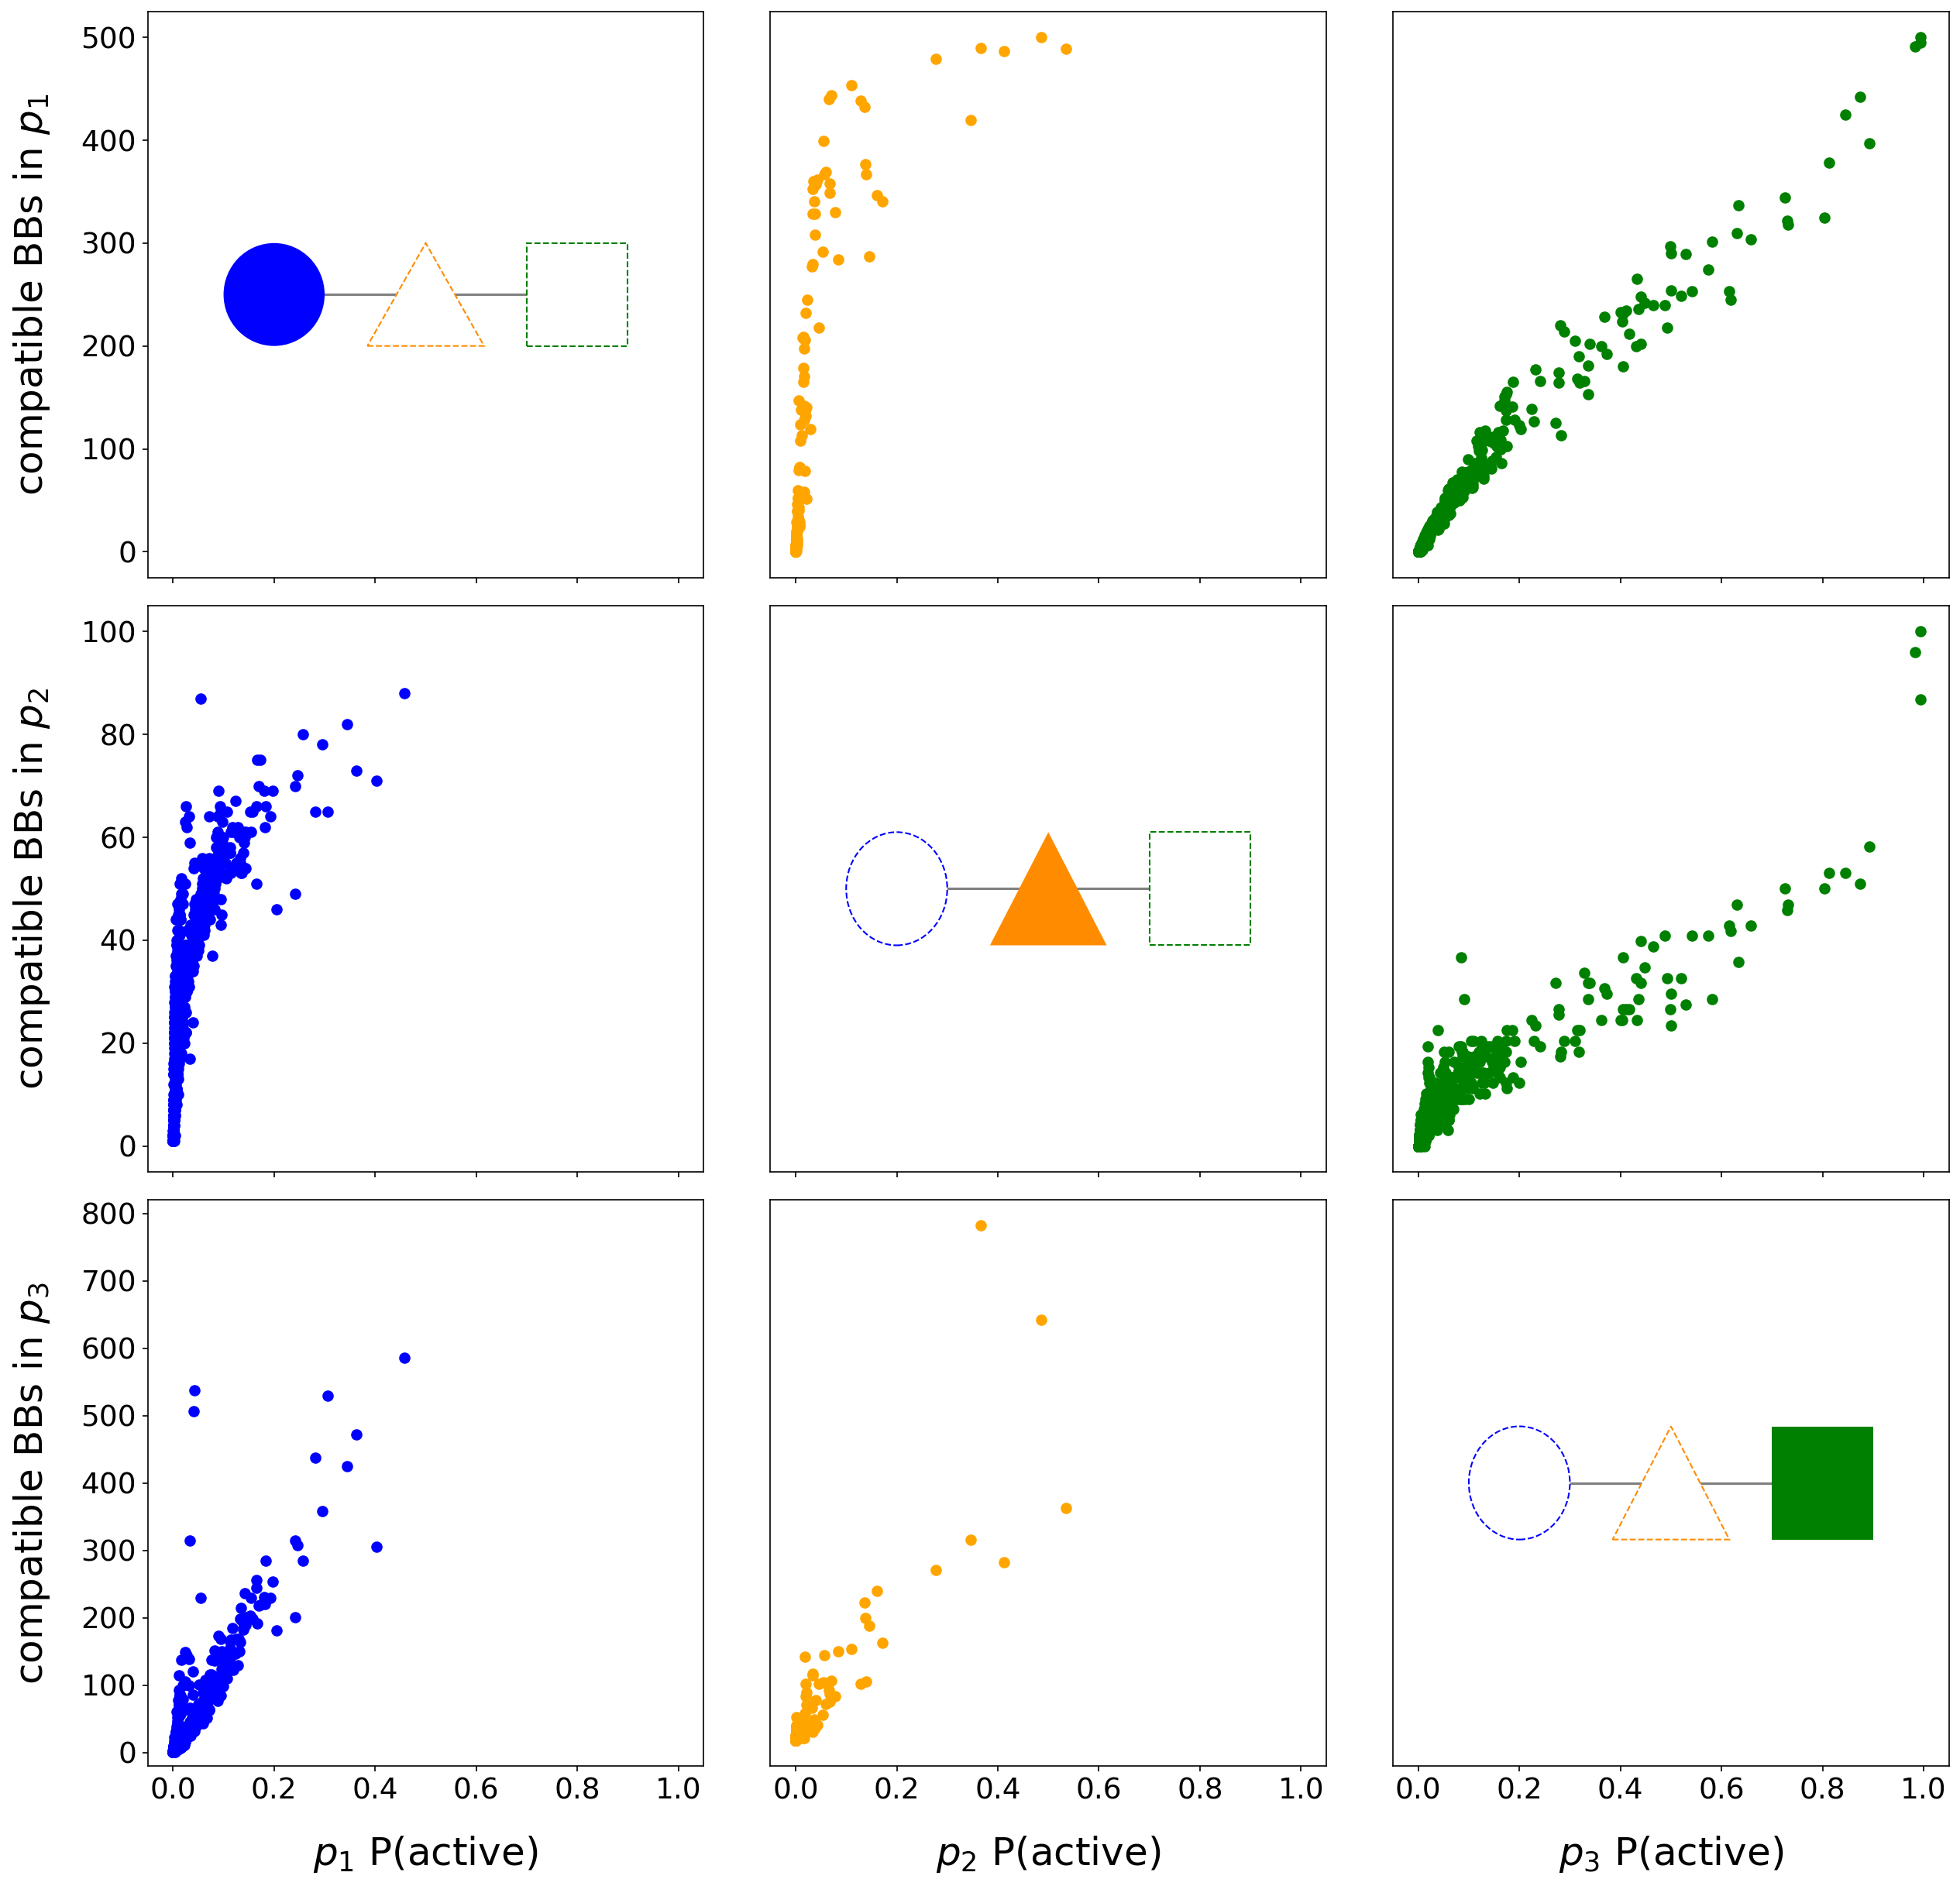

In [9]:
total_merged = merge_df(total_compounds, bb1_pactive, bb2_pactive, bb3_pactive)
actives = get_actives(total_merged)
D_12, D_13, D_21, D_23, D_31, D_32 = plot_compatible(actives)

### View 2D bins

In [10]:
bb1_pactive = apply_bins(bb1_pactive, bb_pos='bb1', all_bins=all_bins)
bb2_pactive = apply_bins(bb2_pactive, bb_pos='bb2', all_bins=all_bins)
bb3_pactive = apply_bins(bb3_pactive, bb_pos='bb3', all_bins=all_bins)

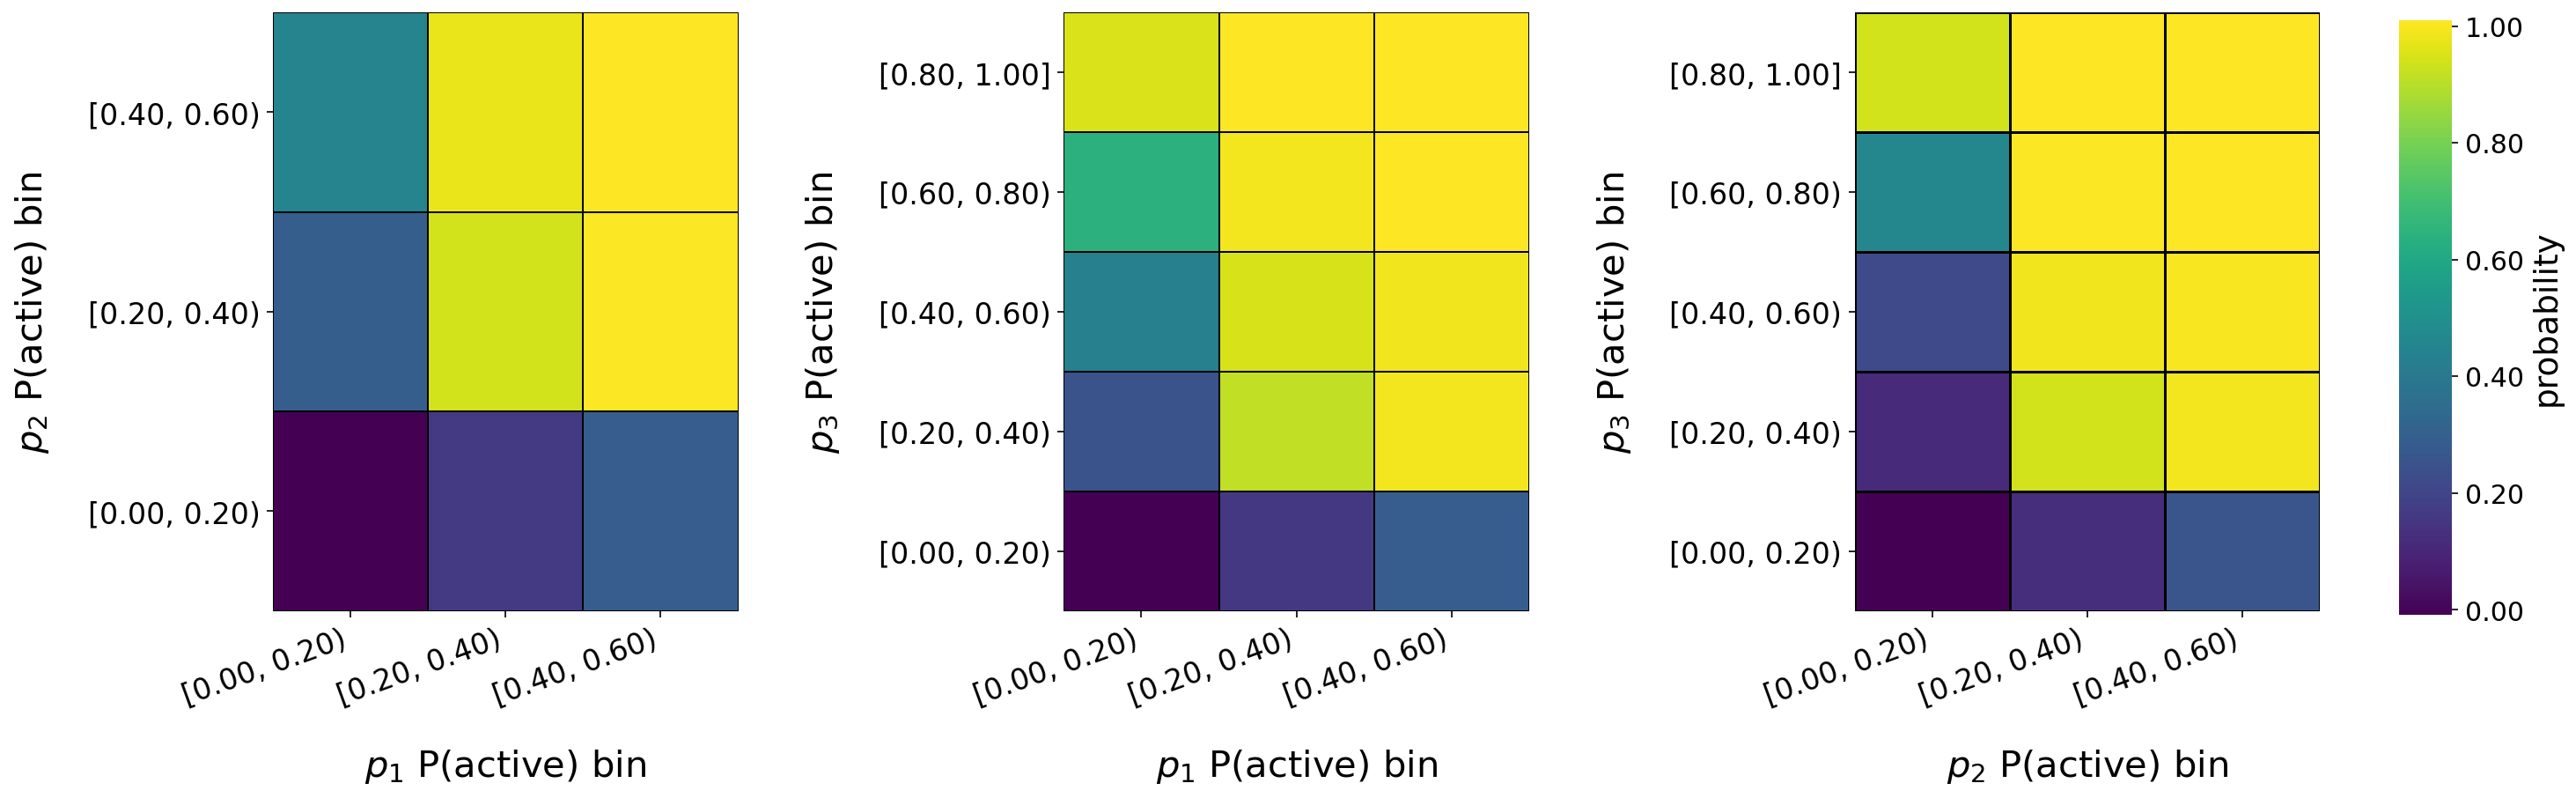

In [12]:
total_bins = merge_df(total_compounds, bb1_pactive, bb2_pactive, bb3_pactive)
bins_1_2, bins_1_3, bins_2_3 = plot_2D_bins(total_bins, bb1_pactive, bb2_pactive, bb3_pactive, all_bins)

### Import similarity matrix

In [13]:
bb1_sim_3D = np.load('../../similarity_calculation/output/bb1_list.npy')
bb2_sim_3D = np.load('../../similarity_calculation/output/bb2_list.npy')
bb3_sim_3D = np.load('../../similarity_calculation/output/bb3_list.npy')

bb1_dist_3D = dist_mat(bb1_sim_3D)
bb2_dist_3D = dist_mat(bb2_sim_3D)
bb3_dist_3D = dist_mat(bb3_sim_3D)

#### Map coordinates with UMAP

In [14]:
trans_bb1 = umap_transform(bb1_dist_3D)
trans_bb2 = umap_transform(bb2_dist_3D)
trans_bb3 = umap_transform(bb3_dist_3D)

,Position,top - top dist,top - rand dist
0,1,3.487797,6.007284
1,2,1.209196,4.787256
2,3,4.603769,8.225290


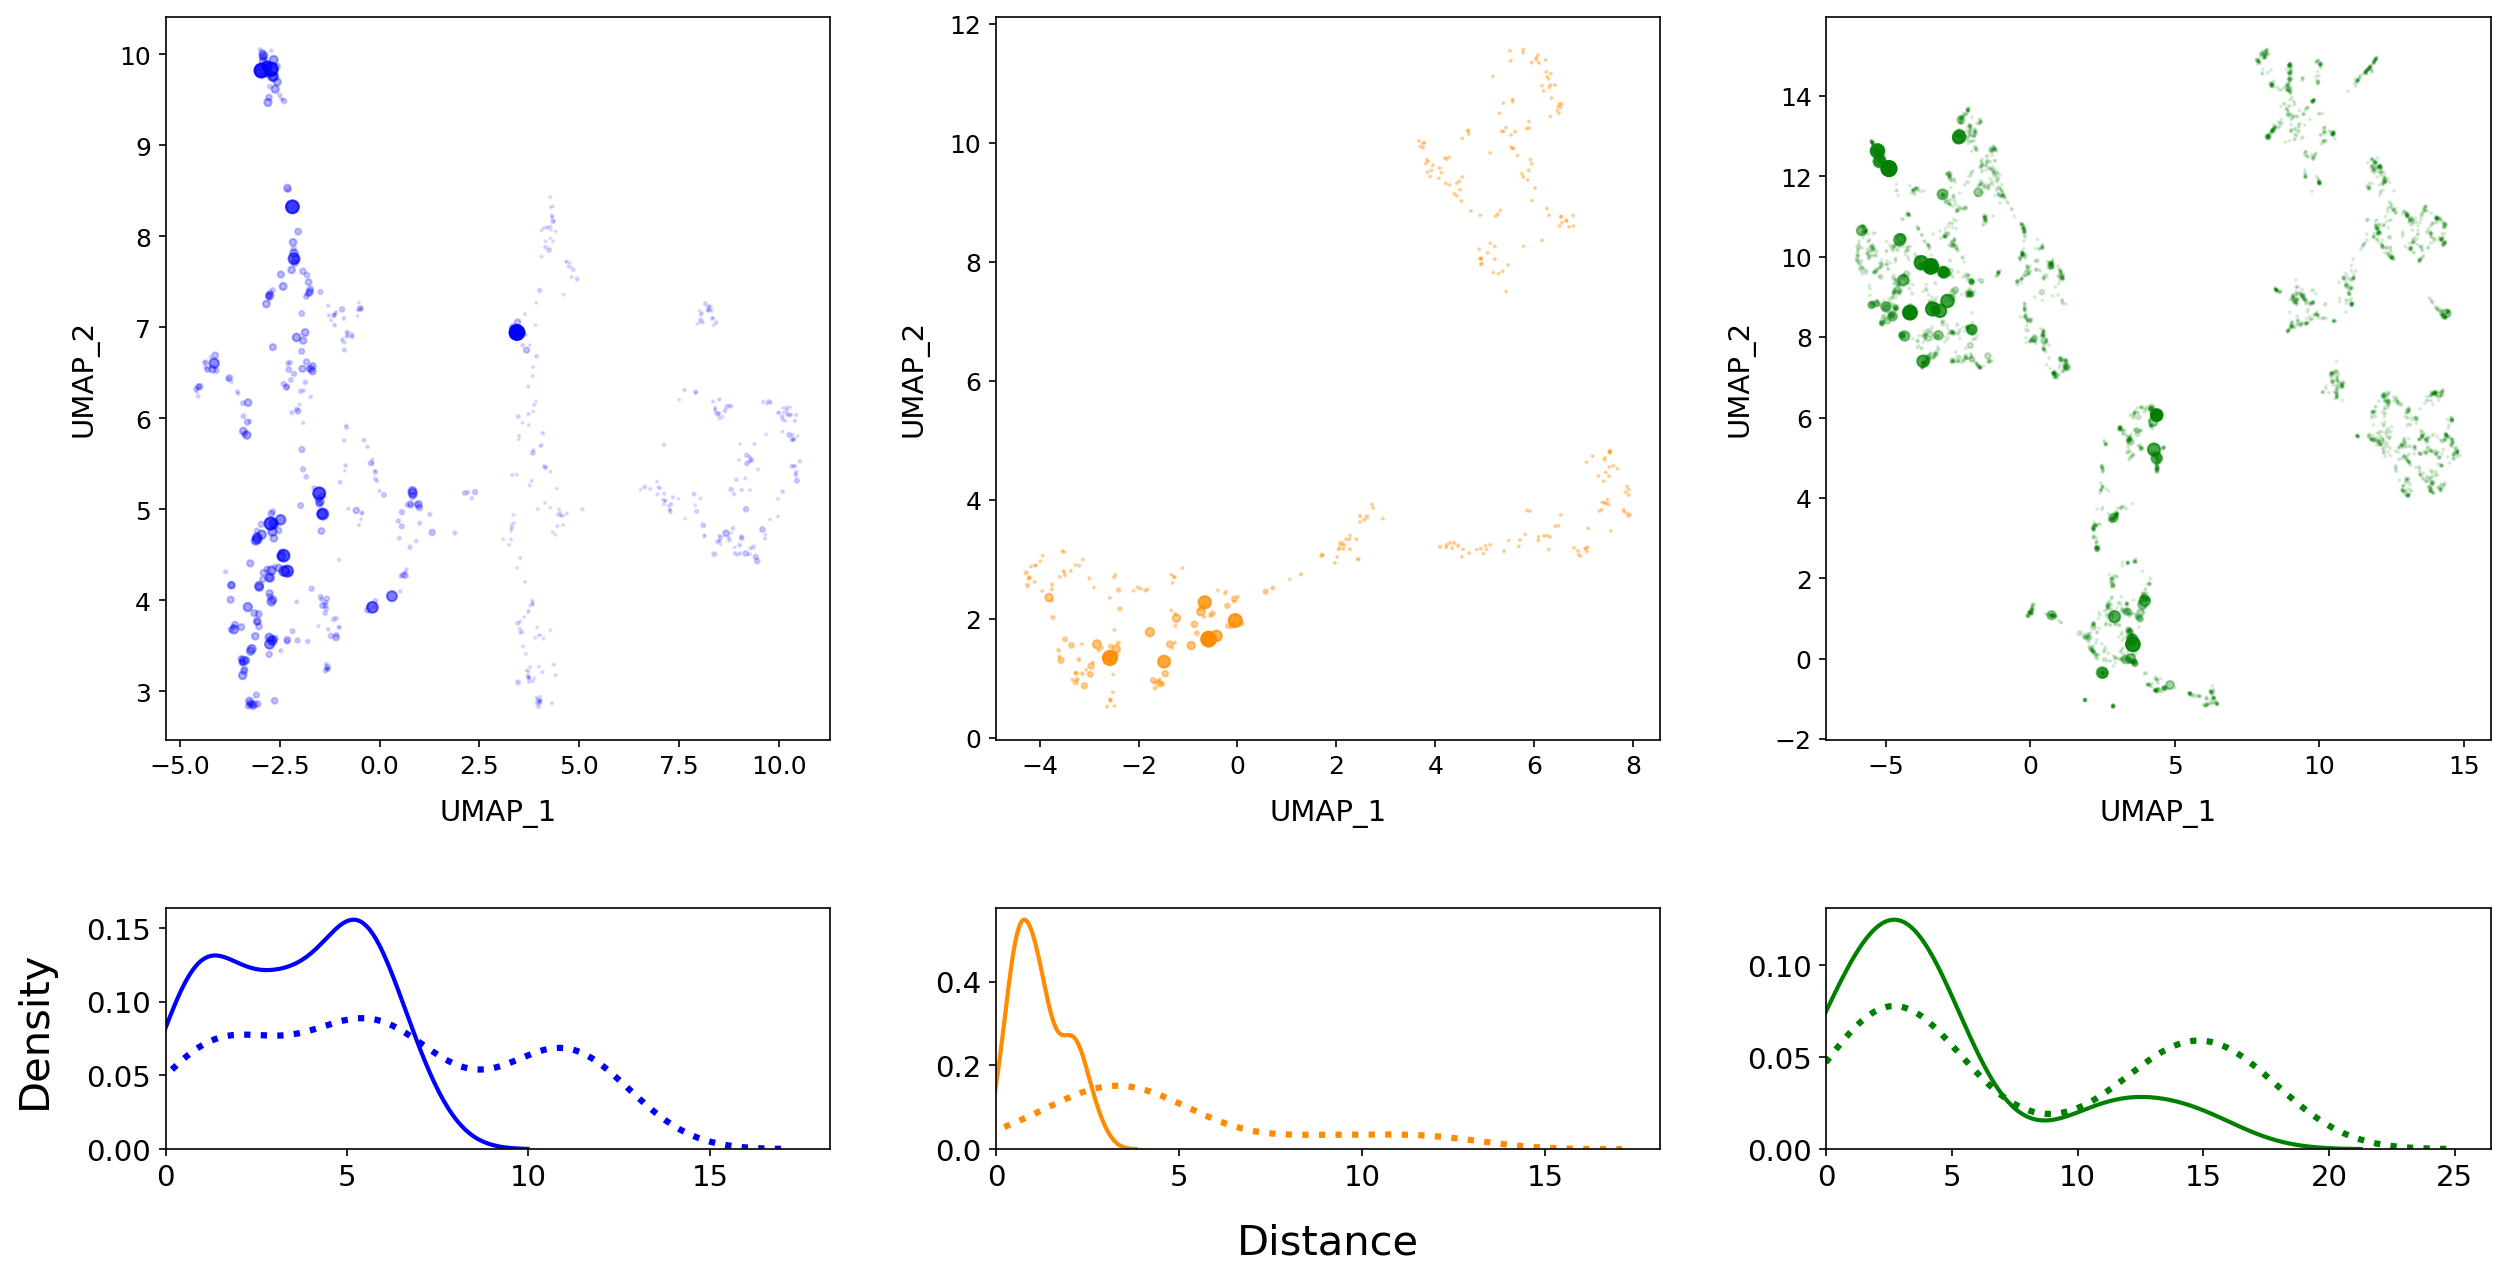

In [15]:
bb1_pactive, bb2_pactive, bb3_pactive = plot_umap(bb1_pactive, bb2_pactive, bb3_pactive, trans_bb1, trans_bb2, trans_bb3)


### Cluster with HDBSCAN

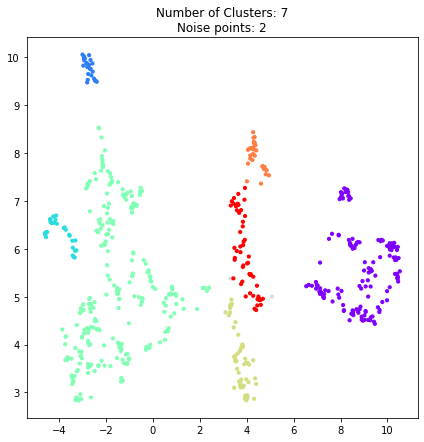

In [16]:
bb1_params = hdbscan_param_search(bb1_pactive, trans_bb1)
bb1_best_params = optimal_params(bb1_params)
bb1_pactive = plot_hdbscan(bb1_pactive, bb1_best_params, trans_bb1)

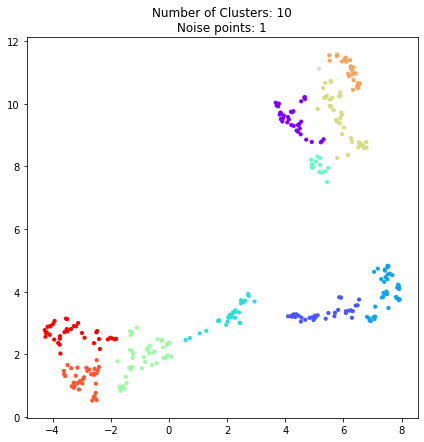

In [17]:
bb2_params = hdbscan_param_search(bb2_pactive, trans_bb2)
bb2_best_params = optimal_params(bb2_params)
bb2_pactive = plot_hdbscan(bb2_pactive, bb2_best_params, trans_bb2)

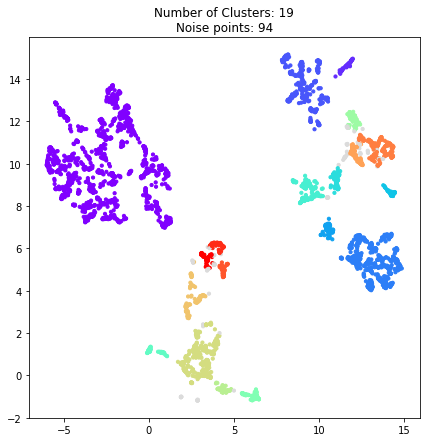

In [18]:
bb3_params = hdbscan_param_search(bb3_pactive, trans_bb3)
bb3_best_params = optimal_params(bb3_params)
bb3_pactive = plot_hdbscan(bb3_pactive, bb3_best_params, trans_bb3)

#### View interactive plots with compound structures (mouse-over point)

In [19]:
#plot_hdbscan_interactive(bb1_pactive, bb1_best_params, trans_bb1, bb_pos='bb1')
#plot_hdbscan_interactive(bb2_pactive, bb2_best_params, trans_bb2, bb_pos='bb2')
#plot_hdbscan_interactive(bb3_pactive, bb3_best_params, trans_bb3, bb_pos='bb3')

### Aggregate by cluster

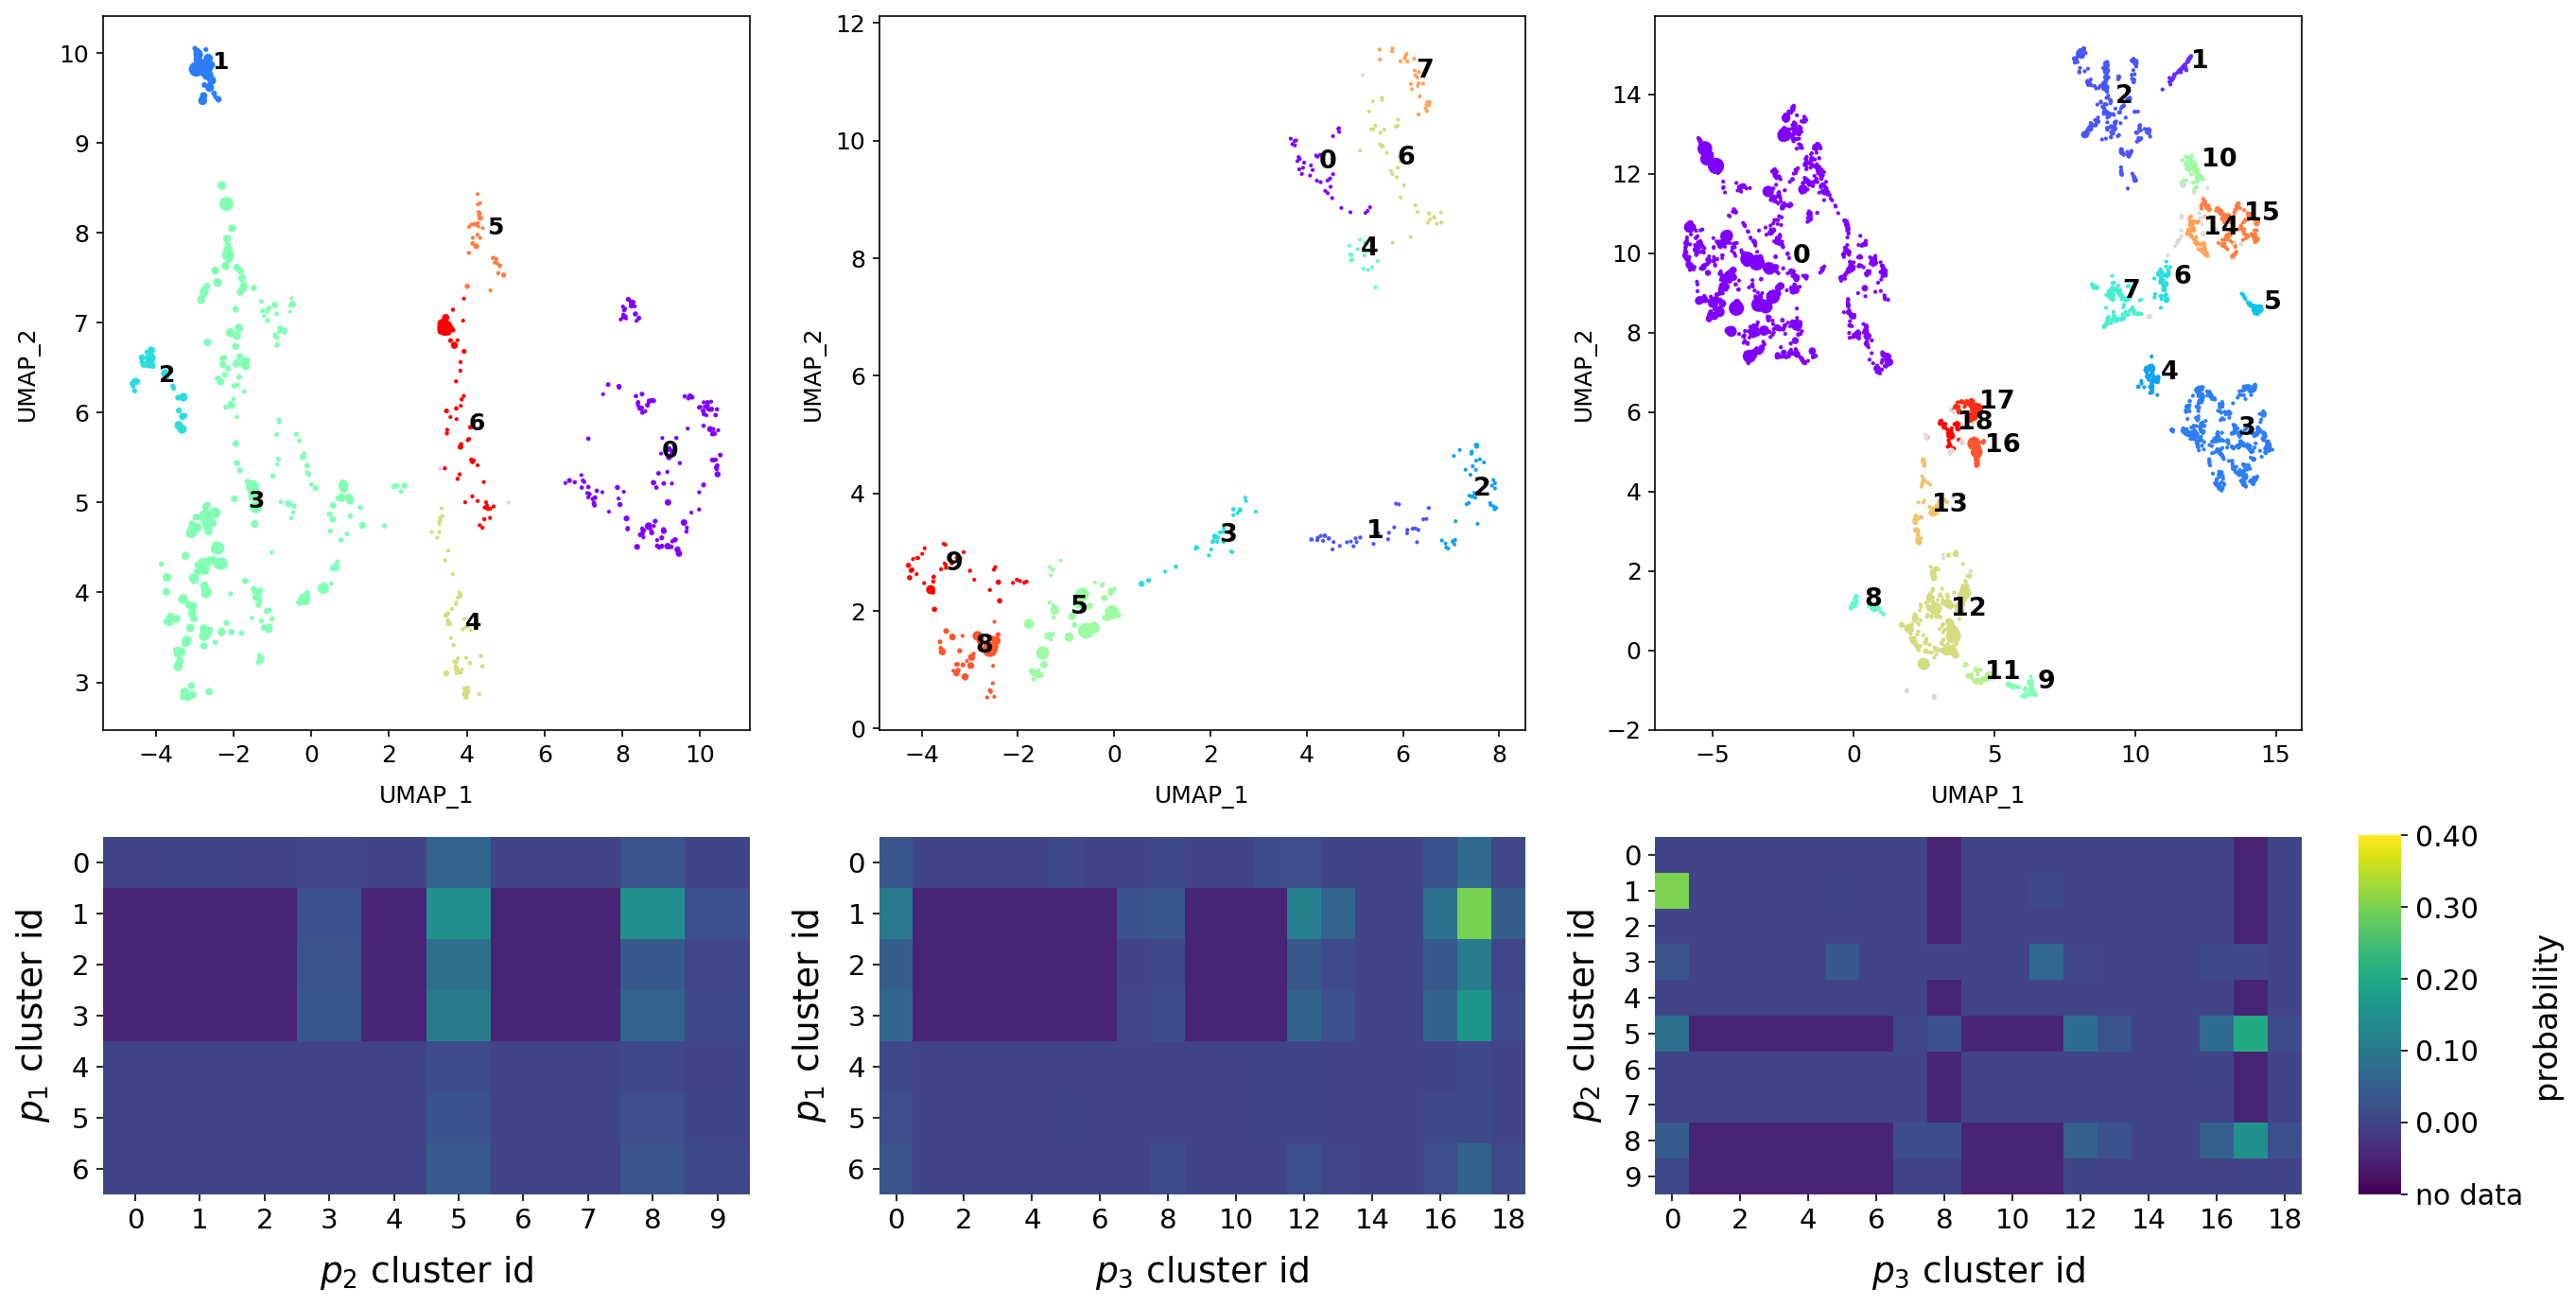

In [20]:
p_12, p_13, p_23 = plot_cluster_combos(total_compounds, bb1_pactive, bb2_pactive, bb3_pactive, trans_bb1, trans_bb2, trans_bb3)

### Distribution of P(active) values and building blocks in each cluster

In [21]:
bb1_cluster, bb1_data = cluster_rep(bb1_pactive, bb_pos='bb1')
bb2_cluster, bb2_data = cluster_rep(bb2_pactive, bb_pos='bb2')
bb3_cluster, bb3_data = cluster_rep(bb3_pactive, bb_pos='bb3')

In [22]:
mols2grid.display(bb3_cluster, subset=['Cluster', 'img', 'Num'])

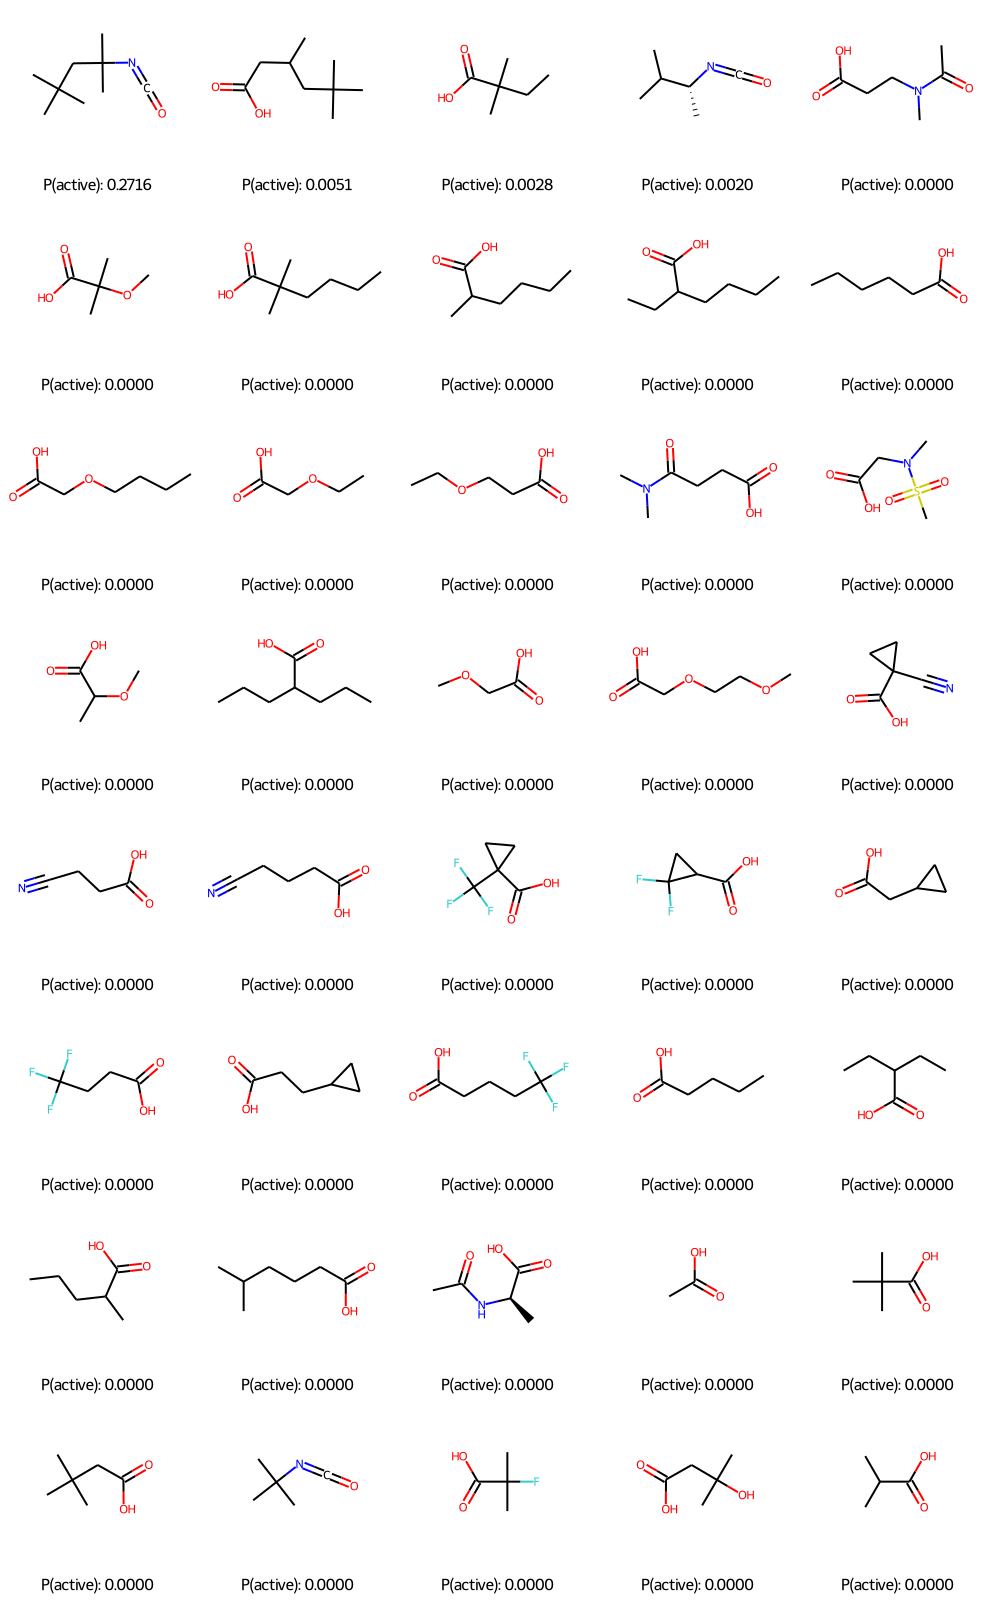

In [28]:
selection = mols2grid.get_selection()
display_cluster_members(bb3_data, selection)

In [24]:
bb1_random = gen_random_cluster(bb1_pactive, bb_pos='bb1')
bb2_random = gen_random_cluster(bb2_pactive, bb_pos='bb2')
bb3_random = gen_random_cluster(bb3_pactive, bb_pos='bb3')

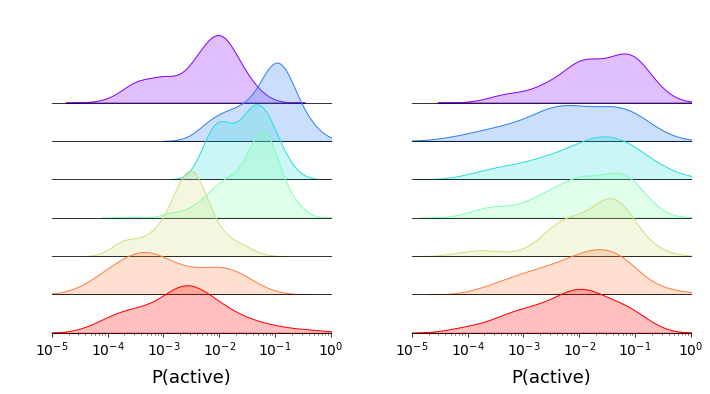

In [25]:
plot_cluster_pactive(bb1_pactive, bb1_random)

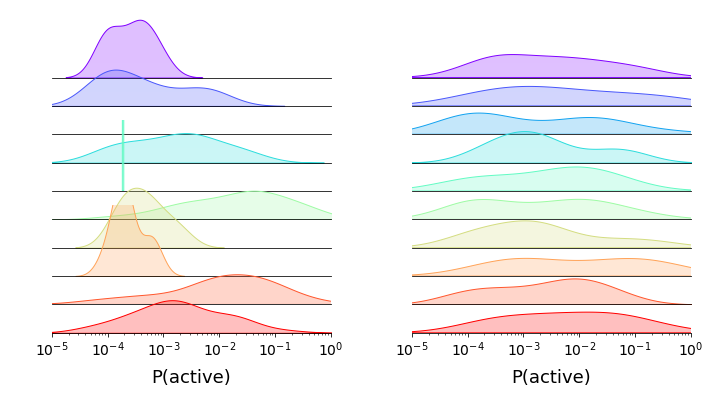

In [26]:
plot_cluster_pactive(bb2_pactive, bb2_random)

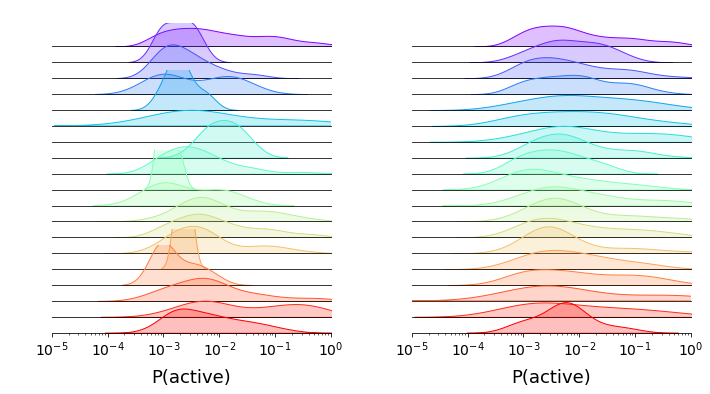

In [27]:
plot_cluster_pactive(bb3_pactive, bb3_random)